# 1. Preparación del dataset

In [1]:
import pandas as pd

df = pd.read_csv("data/dblp_stream.csv")

C:\Users\ocv20\AppData\Local\Temp\ipykernel_18344\2749091570.py:3: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/dblp_stream.csv")


In [2]:
df.tail()

,type,key,mdate,authors,title,year,journal,booktitle,pages,volume,url,ee,crossref,isbn,editor,cite
11538174,article,persons/Codd71b,2020-02-21,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]",Normalized Data Base Structure: A Brief Tutorial.,1971.0,"Research Report / RJ / IBM / San Jose, California",NaN,NaN,RJ935,NaN,NaN,NaN,NaN,NaN,NaN
11538175,article,persons/Codd71,2020-02-21,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]",Data Base Sublanguage Founded on the Relationa...,1971.0,"Research Report / RJ / IBM / San Jose, California",NaN,NaN,RJ893,NaN,NaN,NaN,NaN,NaN,NaN
11538176,article,persons/Hall74,2002-01-03,"[{""name"": ""Patrick A. V. Hall"", ""orcid"": """"}]",Common Subexpression Identification in General...,1974.0,"Technical Rep. UKSC 0060, IBM United Kingdom S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11538177,article,persons/Codd69,2020-02-21,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]","Derivability, Redundancy and Consistency of Re...",1969.0,"Research Report / RJ / IBM / San Jose, California",NaN,NaN,RJ599,NaN,NaN,NaN,NaN,NaN,NaN
11538178,article,persons/Ley95,2018-07-05,"[{""name"": ""Michael Ley"", ""orcid"": """"}]",DB&LP: A WWW Bibliography on Databases and Log...,1995.0,Compulog Newsletter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Elementos unicos por tipo

In [3]:
print("\n--- Análisis de Elementos Únicos por Tipo y Ejemplos ---")

unique_types = df['type'].unique()
print(f"\nTipos de publicación únicos encontrados en df: {unique_types}")

for pub_type in unique_types:
    print(f"\n----- Ejemplos para el Tipo: '{pub_type}' -----")
    samples = df[df['type'] == pub_type].head(5)

    if not samples.empty:
        print(samples[['title', 'booktitle', 'type', 'year']].to_string(index=False))
    else:
        print(f"No hay ejemplos disponibles para el tipo '{pub_type}'.")

type_counts = df['type'].value_counts()

print(type_counts)


--- Análisis de Elementos Únicos por Tipo y Ejemplos ---

Tipos de publicación únicos encontrados en df: ['incollection' 'book' 'proceedings' 'mastersthesis' 'article'
 'inproceedings' 'phdthesis' 'www']

----- Ejemplos para el Tipo: 'incollection' -----
                                                   title                          booktitle         type   year
                                             Curvedness. Computer Vision, A Reference Guide incollection 2014.0
                          Transparency and Translucency. Computer Vision, A Reference Guide incollection 2014.0
Surface Orientation Histogram (Discrete Version of EGI). Computer Vision, A Reference Guide incollection 2014.0
                                    Appearance Scanning. Computer Vision, A Reference Guide incollection 2014.0
                                   Image-Based Lighting. Computer Vision, A Reference Guide incollection 2014.0

----- Ejemplos para el Tipo: 'book' -----
                             

### Elementos nulos en columna "year" por tipo de publicación

In [4]:
import pandas as pd

print("\n--- Porcentaje de Valores Nulos en 'year' por 'type' ---")

grouped_by_type = df.groupby('type')

null_years_count = grouped_by_type['year'].apply(lambda x: x.isnull().sum())

total_entries_count = grouped_by_type.size()

percentage_nulls_by_type = (null_years_count / total_entries_count) * 100
percentage_nulls_by_type = percentage_nulls_by_type.fillna(0).round(2)

print("Conteo de Nulos en 'year' por Tipo:")
print(null_years_count)

print("\nTotal de Entradas por Tipo:")
print(total_entries_count)

print("\nPorcentaje de Valores Nulos en 'year' por Tipo:")
print(percentage_nulls_by_type.astype(str) + '%')

summary_nulls_by_type = pd.DataFrame({
    'Nulos_en_Year': null_years_count,
    'Total_Entradas': total_entries_count,
    'Porcentaje_Nulos_Year': percentage_nulls_by_type
})

print("\nResumen Completo de Nulos en 'year' por Tipo:")
print(summary_nulls_by_type.to_string())



--- Porcentaje de Valores Nulos en 'year' por 'type' ---
Conteo de Nulos en 'year' por Tipo:
type
article                3
book                   0
incollection           0
inproceedings          0
mastersthesis          0
phdthesis              0
proceedings            0
www              3755827
Name: year, dtype: int64

Total de Entradas por Tipo:
type
article          3824585
book               21006
incollection       70874
inproceedings    3662017
mastersthesis         27
phdthesis         142429
proceedings        61397
www              3755844
dtype: int64

Porcentaje de Valores Nulos en 'year' por Tipo:
type
article            0.0%
book               0.0%
incollection       0.0%
inproceedings      0.0%
mastersthesis      0.0%
phdthesis          0.0%
proceedings        0.0%
www              100.0%
dtype: object

Resumen Completo de Nulos en 'year' por Tipo:
               Nulos_en_Year  Total_Entradas  Porcentaje_Nulos_Year
type                                                  

### Analizando títulos únicos en tipo www, a ver si entrega información interesante para el estudio

In [5]:
tipo_a_analizar = 'www'

print(f"\n--- Análisis para el Tipo: '{tipo_a_analizar}' ---")

df_filtered_by_type = df[df['type'] == tipo_a_analizar].copy() 

print(f"Filas iniciales para el tipo '{tipo_a_analizar}': {len(df_filtered_by_type)}")

initial_rows_after_type_filter = len(df_filtered_by_type)
df_filtered_by_type.dropna(subset=['title'], inplace=True)
dropped_nan_titles = initial_rows_after_type_filter - len(df_filtered_by_type)

if dropped_nan_titles > 0:
    print(f"Se eliminaron {dropped_nan_titles} filas con título NaN para el tipo '{tipo_a_analizar}'.")
else:
    print(f"No se encontraron filas con título NaN para el tipo '{tipo_a_analizar}'.")

rows_to_drop_homepage = df_filtered_by_type[df_filtered_by_type['title'] == 'Home Page'].index
df_filtered_by_type.drop(index=rows_to_drop_homepage, inplace=True)
dropped_homepage_titles = len(rows_to_drop_homepage)

if dropped_homepage_titles > 0:
    print(f"Se eliminaron {dropped_homepage_titles} filas con título 'Home Page' para el tipo '{tipo_a_analizar}'.")
else:
    print(f"No se encontraron filas con título 'Home Page' para el tipo '{tipo_a_analizar}'.")

print(f"\n--- Conteo de Títulos Únicos para el Tipo: '{tipo_a_analizar}' después de limpieza ---")
if not df_filtered_by_type.empty:
    unique_titles_count = df_filtered_by_type['title'].nunique()

    print(f"Número total de publicaciones de tipo '{tipo_a_analizar}' después de limpieza: {len(df_filtered_by_type)}")
    print(f"Número de títulos únicos para el tipo '{tipo_a_analizar}': {unique_titles_count}")
    print("\nAlgunos ejemplos de títulos únicos (primeros 20 después de limpieza):")
    print(df_filtered_by_type['title'].drop_duplicates().head(20).tolist())

    null_years_count_for_type = df_filtered_by_type['year'].isnull().sum()
    total_entries_for_type = len(df_filtered_by_type)

    if total_entries_for_type > 0: 
        percentage_nulls_for_type = (null_years_count_for_type / total_entries_for_type) * 100
        percentage_nulls_for_type = round(percentage_nulls_for_type, 2)
    else:
        percentage_nulls_for_type = 0.0

    print("\n--- Conteo y Porcentaje de Nulos en 'year' para el Tipo Específico (después de limpieza de títulos) ---")
    print(f"Conteo de Nulos en 'year' para '{tipo_a_analizar}': {null_years_count_for_type}")
    print(f"Porcentaje de Nulos en 'year' para '{tipo_a_analizar}': {percentage_nulls_for_type}%")

else:
    print(f"No se encontraron publicaciones de tipo '{tipo_a_analizar}' en el DataFrame 'df' después de la limpieza, o el tipo no existe.")
    print("Asegúrate de que el tipo especificado es correcto y existe en la columna 'type'.")

print("\n--- Primeras 10 filas del DataFrame filtrado y limpiado ---")
if not df_filtered_by_type.empty:
    print(df_filtered_by_type.head(10).to_string())
else:
    print("El DataFrame filtrado está vacío después de la limpieza.")


--- Análisis para el Tipo: 'www' ---
Filas iniciales para el tipo 'www': 3755844
Se eliminaron 1533 filas con título NaN para el tipo 'www'.
Se eliminaron 3754294 filas con título 'Home Page' para el tipo 'www'.

--- Conteo de Títulos Únicos para el Tipo: 'www' después de limpieza ---
Número total de publicaciones de tipo 'www' después de limpieza: 17
Número de títulos únicos para el tipo 'www': 17

Algunos ejemplos de títulos únicos (primeros 20 después de limpieza):
['XML-QL: A Query Language for XML', 'The XML Query Algebra', 'W3C: Extensible Markup Language (XML) 1.0 - first edition.', 'XML Query Requirements', 'XML Query Data Model', 'XQuery: A Query Language for XML', 'XML Query Use Cases', 'W3C: Extensible Stylesheet Language (XSL)', 'W3C: Document Oject Model (DOM)', 'W3C: The w3c Query Language Workshop, December 1998, Boston, MA, USA', 'Internet Draft: Hypertext Transfer Protocol - HTTP/1.1', 'WfMC Standards: The Workflow Reference Model, Version 1.1.', 'The SGML/XML Web Pag

Notamos que el 100% de elementos nulos en columna year son elementos del tipo www, y que de estos solo 17 elementos son validos, por lo tanto se pueden eliminar todos los elementos con NaN en la columna year del dataframe sin perder informacion escencial

### Eliminando titulos y años nulos

In [6]:
# --- Manejo de Valores Nulos en Columnas Clave ---
print("\nVerificando y manejando valores nulos...")
print(df.isnull().sum())

df_clean = df.copy()

df_clean.dropna(subset=['title'], inplace=True)
print(f"Filas después de eliminar nulos en 'title': {len(df_clean)}")

df_clean.dropna(subset=['year'], inplace=True)
print(f"Filas después de eliminar nulos en 'year': {len(df_clean)}")

df_clean['year'] = df_clean['year'].astype(int)


Verificando y manejando valores nulos...
type                0
key                 0
mdate               0
authors             0
title            7240
year          3755830
journal       7713594
booktitle     7742606
pages         5004777
volume        7681295
url           3706802
ee            3934397
crossref      7806689
isbn         11459011
editor       11490200
cite         11529709
dtype: int64
Filas después de eliminar nulos en 'title': 11530939
Filas después de eliminar nulos en 'year': 7776642


In [7]:
# --- Manejo de Valores Nulos en Columnas Clave ---
print("\nVerificando y manejando valores nulos...")
print(df_clean.isnull().sum())

df_clean.drop(columns=['isbn', 'editor', 'cite', 'volume', 'url', 'ee', 'crossref', 'mdate', 'pages', 'key'])


Verificando y manejando valores nulos...
type               0
key                0
mdate              0
authors            0
title              0
year               0
journal      3956635
booktitle    3982198
pages        1248655
volume       3924336
url           161773
ee            178555
crossref     4047857
isbn         7697475
editor       7728663
cite         7768379
dtype: int64


,type,authors,title,year,journal,booktitle
0,incollection,[],Curvedness.,2014,NaN,"Computer Vision, A Reference Guide"
1,incollection,"[{""name"": ""Manish Singh 0001"", ""orcid"": """"}]",Transparency and Translucency.,2014,NaN,"Computer Vision, A Reference Guide"
2,incollection,[],Surface Orientation Histogram (Discrete Versio...,2014,NaN,"Computer Vision, A Reference Guide"
3,incollection,[],Appearance Scanning.,2014,NaN,"Computer Vision, A Reference Guide"
4,incollection,"[{""name"": ""Tien-Tsin Wong"", ""orcid"": """"}]",Image-Based Lighting.,2014,NaN,"Computer Vision, A Reference Guide"
...,...,...,...,...,...,...
11538174,article,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]",Normalized Data Base Structure: A Brief Tutorial.,1971,"Research Report / RJ / IBM / San Jose, California",NaN
11538175,article,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]",Data Base Sublanguage Founded on the Relationa...,1971,"Research Report / RJ / IBM / San Jose, California",NaN
11538176,article,"[{""name"": ""Patrick A. V. Hall"", ""orcid"": """"}]",Common Subexpression Identification in General...,1974,"Technical Rep. UKSC 0060, IBM United Kingdom S...",NaN
11538177,article,"[{""name"": ""E. F. Codd"", ""orcid"": """"}]","Derivability, Redundancy and Consistency of Re...",1969,"Research Report / RJ / IBM / San Jose, California",NaN


### Eliminando books con posible repetición con booktitle

In [8]:
import pandas as pd
import numpy as np
import re


def clean_text(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.strip()
    return text

print("\n--- Eliminando filas de tipo 'book' con títulos coincidentes ---")

total_books_initial_count = len(df_clean[df_clean['type'] == 'book'])
print(f"Total de elementos de tipo 'book' en el DataFrame antes de la eliminación: {total_books_initial_count}")

books_cleaned_titles = df_clean[df_clean['type'] == 'book']['title'].apply(clean_text).dropna()

all_cleaned_booktitles = df_clean['booktitle'].apply(clean_text).dropna()


unique_cleaned_book_titles = books_cleaned_titles.unique()
all_unique_cleaned_booktitles = all_cleaned_booktitles.unique()


print(f"\nNúmero de títulos únicos de tipo 'book' (después de limpieza): {len(unique_cleaned_book_titles)}")
print(f"Número de booktitles únicos en todo el DataFrame (después de limpieza): {len(all_unique_cleaned_booktitles)}")

set_unique_cleaned_book_titles = set(unique_cleaned_book_titles)
set_all_unique_cleaned_booktitles = set(all_unique_cleaned_booktitles)

matching_titles_cleaned = list(set_unique_cleaned_book_titles.intersection(set_all_unique_cleaned_booktitles))
rows_to_drop_indices = df_clean[
    (df_clean['type'] == 'book') &
    (df_clean['title'].apply(clean_text).isin(matching_titles_cleaned))
].index

df_clean.drop(index=rows_to_drop_indices, inplace=True)

dropped_count = len(rows_to_drop_indices)
print(f"\nSe eliminaron {dropped_count} filas de tipo 'book' que tuvieron coincidencia de título.")

total_books_after_drop = len(df_clean[df_clean['type'] == 'book'])
print(f"Total de elementos de tipo 'book' en el DataFrame después de la eliminación: {total_books_after_drop}")

if len(matching_titles_cleaned) > 0:
    print("\nEjemplos de los títulos limpios que causaron la coincidencia:")
    for title in matching_titles_cleaned[:10]:
        print(f"- {title}")
else:
    print("No se encontraron coincidencias después de la limpieza de texto, por lo que no se eliminaron filas.")


--- Eliminando filas de tipo 'book' con títulos coincidentes ---
Total de elementos de tipo 'book' en el DataFrame antes de la eliminación: 21005

Número de títulos únicos de tipo 'book' (después de limpieza): 20877
Número de booktitles únicos en todo el DataFrame (después de limpieza): 17886

Se eliminaron 1447 filas de tipo 'book' que tuvieron coincidencia de título.
Total de elementos de tipo 'book' en el DataFrame después de la eliminación: 19558

Ejemplos de los títulos limpios que causaron la coincidencia:
- advanced course on fairshape
- symposium on semantics of algorithmic languages
- recent advances in the 3d physiological human
- finite and algorithmic model theory
- fighting terror in cyberspace
- new trends in agent based complex automated negotiations
- a practical guide to testing wireless smartphone applications
- advances in experimental social psychology
- human centered robot systems cognition interaction technology
- encyclopedia of social network analysis and mini

In [9]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ocv20\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ocv20\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ocv20\AppData\Roaming\nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

print("\n--- Paso 1.5 (Revisado con Limpieza Adicional de Títulos): Preparación Inteligente del Contenido para Modelado de Temas ---")

df_clean['year'] = df_clean['year'].astype(int)

df_clean['unique_publication_id'] = df_clean.index.astype(str)

df_clean['content_for_topic_modeling'] = df_clean['title'] 

incollection_mask = (df_clean['type'] == 'incollection') & (df_clean['booktitle'].notna())

df_clean.loc[incollection_mask, 'content_for_topic_modeling'] = df_clean.loc[incollection_mask, 'booktitle']

df_clean.loc[incollection_mask, 'unique_publication_id'] = \
    df_clean.loc[incollection_mask, 'booktitle'] + '_' + df_clean.loc[incollection_mask, 'year'].astype(str)

print(f"Filas iniciales en df_clean: {len(df_clean)}")

columns_to_keep_in_analysis = [
    'type', 'title', 'booktitle', 'content_for_topic_modeling', 'year', 'unique_publication_id'
]
actual_columns_to_keep = [col for col in columns_to_keep_in_analysis if col in df_clean.columns]

df_for_analysis = df_clean[actual_columns_to_keep].drop_duplicates(
    subset=['unique_publication_id'], keep='first'
).copy()

print(f"Filas en df_for_analysis (después de deduplicación inteligente): {len(df_for_analysis)}")
print("\nPrimeras 10 filas de df_for_analysis (contenido y IDs):")
print(df_for_analysis[['type', 'title', 'booktitle', 'content_for_topic_modeling', 'year', 'unique_publication_id']].head(10).to_string())

def clean_text(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower()
    text = re.sub(r'\b(?:vol(?:ume)?|part|no|number|cap|chapter|pp)\s+\d+\b', '', text)
    text = re.sub(r'\b\d+(?:st|nd|rd|th)?\s+(?:ed|edition)\b', '', text)
    text = re.sub(r'\(.*?\)', '', text) # Eliminar cualquier texto entre paréntesis
    text = re.sub(r'\[.*?\]', '', text) # Eliminar cualquier texto entre corchetes
    text = re.sub(r'\W', ' ', text) # Remover caracteres no alfanuméricos
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remover espacios extra
    text = text.strip() # Remover espacios al inicio y al final
    return text

# --- Tokenización y lematización ---
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenize_and_lemmatize(text):
    if pd.isna(text):
        return np.nan
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df_for_analysis.drop(columns=['title', 'booktitle'], inplace=True, errors='ignore')

df_for_analysis['cleaned_content'] = df_for_analysis['content_for_topic_modeling'].apply(clean_text)
df_for_analysis['processed_content'] = df_for_analysis['cleaned_content'].apply(tokenize_and_lemmatize)

df_for_analysis.dropna(subset=['processed_content'], inplace=True)

print(f"\nFilas en df_for_analysis (después de procesamiento de texto y eliminación de nulos): {len(df_for_analysis)}")
print("\nPrimeras filas del DataFrame de análisis con contenido limpio y procesado:")
print(df_for_analysis[['type', 'content_for_topic_modeling', 'processed_content']].head().to_string())


--- Paso 1.5 (Revisado con Limpieza Adicional de Títulos): Preparación Inteligente del Contenido para Modelado de Temas ---
Filas iniciales en df_clean: 7775195
Filas en df_for_analysis (después de deduplicación inteligente): 7706756

Primeras 10 filas de df_for_analysis (contenido y IDs):
              type                                                                title                                                booktitle                                           content_for_topic_modeling  year                                         unique_publication_id
0     incollection                                                          Curvedness.                       Computer Vision, A Reference Guide                                   Computer Vision, A Reference Guide  2014                       Computer Vision, A Reference Guide_2014
535   incollection                                        Population Encoding/Decoding.               Encyclopedia of Computational Neuroscience

In [11]:
df_for_analysis.head(10000)

,type,content_for_topic_modeling,year,unique_publication_id,cleaned_content,processed_content
0,incollection,"Computer Vision, A Reference Guide",2014,"Computer Vision, A Reference Guide_2014",computer vision a reference guide,computer vision reference guide
535,incollection,Encyclopedia of Computational Neuroscience,2014,Encyclopedia of Computational Neuroscience_2014,encyclopedia of computational neuroscience,encyclopedia computational neuroscience
1110,incollection,Encyclopedia of Cryptography and Security,2005,Encyclopedia of Cryptography and Security_2005,encyclopedia of cryptography and security,encyclopedia cryptography security
1111,incollection,Encyclopedia of Cryptography and Security (2nd...,2011,Encyclopedia of Cryptography and Security (2nd...,encyclopedia of cryptography and security,encyclopedia cryptography security
2746,incollection,Handbook of Visual Display Technology,2012,Handbook of Visual Display Technology_2012,handbook of visual display technology,handbook visual display technology
...,...,...,...,...,...,...
54265,inproceedings,Abstract Data Types and High-Level Synthesis.,1990,54265,abstract data types and high level synthesis,abstract data type high level synthesis
54266,inproceedings,Walking Pads: Managing C4 Placement for Transi...,2014,54266,walking pads managing c4 placement for transie...,walking pad managing c4 placement transient vo...
54267,inproceedings,Multi-resource aware partitioning algorithms f...,2004,54267,multi resource aware partitioning algorithms f...,multi resource aware partitioning algorithm fp...
54268,inproceedings,Observations of a CAD user (Position Paper).,1980,54268,observations of a cad user,observation cad user


# 2. Trabajando el modelo

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización TF-IDF con n-gramas
tfidf_vectorizer = TfidfVectorizer(max_features=50, min_df=5, max_df=0.85, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df_for_analysis['processed_content'])

print(f"\nDimensiones de la matriz TF-IDF con n-gramas: {tfidf_matrix.shape}")
print("\nPrimeras 100 características (palabras/n-gramas) detectadas:")
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[:100])


Dimensiones de la matriz TF-IDF con n-gramas: (7706756, 50)

Primeras 100 características (palabras/n-gramas) detectadas:
['adaptive' 'algorithm' 'analysis' 'application' 'approach' 'based'
 'classification' 'communication' 'control' 'data' 'deep' 'design'
 'detection' 'distributed' 'dynamic' 'efficient' 'estimation' 'evaluation'
 'feature' 'framework' 'graph' 'high' 'image' 'information' 'language'
 'learning' 'machine' 'management' 'method' 'mobile' 'model' 'modeling'
 'multi' 'network' 'neural' 'neural network' 'new' 'optimization'
 'performance' 'power' 'problem' 'recognition' 'sensor' 'service' 'study'
 'system' 'time' 'using' 'via' 'wireless']


In [13]:
print(feature_names[:1000])

['19' '2d' '3d' '5g' 'abstract' 'access' 'accuracy' 'accurate' 'acoustic'
 'acquisition' 'across' 'action' 'active' 'activity' 'ad' 'ad hoc'
 'adaptation' 'adaptive' 'advanced' 'adversarial' 'aerial' 'agent'
 'agent system' 'aggregation' 'ai' 'aided' 'air' 'algebra' 'algebraic'
 'algorithm' 'algorithm based' 'alignment' 'allocation' 'among' 'analog'
 'analysis' 'analytics' 'analyzing' 'annotation' 'anomaly'
 'anomaly detection' 'antenna' 'application' 'applied' 'applying'
 'approach' 'approximate' 'approximation' 'architecture' 'area' 'array'
 'art' 'artificial' 'artificial intelligence' 'aspect' 'assessing'
 'assessment' 'assignment' 'assisted' 'association' 'asynchronous'
 'attack' 'attention' 'attribute' 'audio' 'augmentation' 'augmented'
 'authentication' 'automated' 'automatic' 'automaton' 'autonomous' 'aware'
 'balancing' 'band' 'bandwidth' 'base' 'based' 'based approach'
 'based multi' 'bayesian' 'behavior' 'benchmark' 'beyond' 'bias' 'big'
 'big data' 'binary' 'bit' 'blind' 'bl


--- Paso 4: Clustering para la Detección de Temas (Obtención de Categorías) ---

Se asignaron 10 categorías (clusters) a las publicaciones.

Conteo de publicaciones por categoría:
cluster
0     268113
1    3975503
2     960197
3     381230
4     552039
5     437123
6     435022
7     436915
8     119600
9     141014
Name: count, dtype: int64

Primeras filas del DataFrame con la asignación de categorías:
                            processed_content  cluster
0             computer vision reference guide        1
535   encyclopedia computational neuroscience        1
1110       encyclopedia cryptography security        1
1111       encyclopedia cryptography security        1
2746       handbook visual display technology        1


C:\Users\ocv20\AppData\Local\Temp\ipykernel_18344\3117926918.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_for_analysis, palette='viridis')


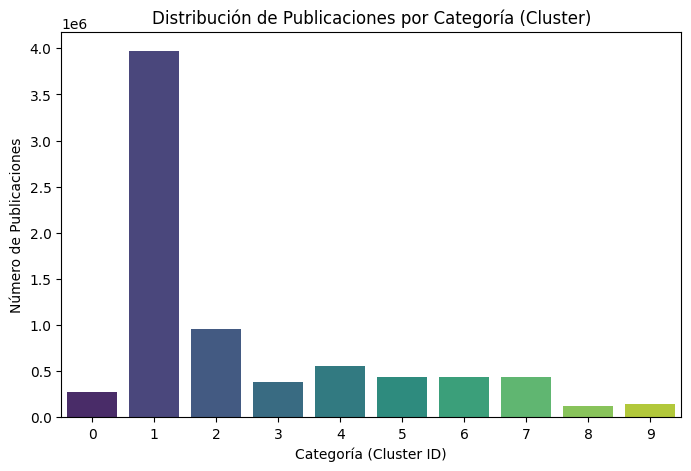

In [17]:
from sklearn.cluster import MiniBatchKMeans

print("\n--- Paso 4: Clustering para la Detección de Temas (Obtención de Categorías) ---")

num_clusters = 10

kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init='auto', random_state=42)

kmeans_model.fit(tfidf_matrix)

df_for_analysis['cluster'] = kmeans_model.labels_

print(f"\nSe asignaron {num_clusters} categorías (clusters) a las publicaciones.")
print("\nConteo de publicaciones por categoría:")
print(df_for_analysis['cluster'].value_counts().sort_index())

print("\nPrimeras filas del DataFrame con la asignación de categorías:")
print(df_for_analysis[['processed_content', 'cluster']].head().to_string())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df_for_analysis, palette='viridis')
plt.title('Distribución de Publicaciones por Categoría (Cluster)')
plt.xlabel('Categoría (Cluster ID)')
plt.ylabel('Número de Publicaciones')
plt.show()